In [1]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt
import sys
import os

Welcome to JupyROOT 6.22/02


In [2]:
def make_histo(Data_array,Title,nbins,xmin,xmax,save=True):
    Histo = ROOT.TH1F(Title,Title,nbins,xmin,xmax)
    for value in Data_array:
        Histo.Fill(value)

    Canv=ROOT.TCanvas()
    Histo.Draw()
    
    if save:
        Image_name=Title + '_Histo.pdf'
        Canv.Print(Image_name)
    
    return Histo, Canv

In [ ]:
name='gold_47_SC_90m_211220'
name.split('_')

angle=int(name.split('_')[1])*(1 if name.split('_')[2]=='DC' else -1)

file=open('gold_47_SC_90m_211220/Stat_gold_47_SC_90m_211220.txt')
line=file.readlines()
for l in line:
    if (l.startswith("Readout_time")):
        time=float(l.split('=')[1].strip()[:-1])
    if (l.startswith("Strobe")):
        Strobe=int(l.split('=')[1].strip()[:-1])
    if (l.startswith("Gap")):
        Gap=int(l.split('=')[1].strip()[:-1])
        
weight=3600*(Gap+Strobe)/(Strobe*time)

os.system("python Packet_analyzer.py -f gold_47_SC_90m_211220 -p -A DB -d 1 10 -b 1000 -s %i -w %f " % (angle,weight))



# Analysis on a specific dataset

In [ ]:
files=os.listdir()
for name in files:
    if name.startswith("gold_"):
        angle=int(name.split('_')[1])*(1 if name.split('_')[2]=='DC' else -1)

        file=open(name+"/Stat_"+name+".txt")
        line=file.readlines()
        for l in line:
            if (l.startswith("Readout_time")):
                time=float(l.split('=')[1].strip()[:-1])
            if (l.startswith("Strobe")):
                Strobe=int(l.split('=')[1].strip()[:-1])
            if (l.startswith("Gap")):
                Gap=int(l.split('=')[1].strip()[:-1])
                
        #weight that gives count/hour
        weight=3600*(Gap+Strobe)/(Strobe*time)

        os.system("python Packet_analyzer.py -f " + name + " -p -A DB -d 1 10 -b 1000 -s %i -w %f " % (angle,weight))

In [ ]:
! $ROOTSYS/bin/hadd Tot_63_2.root Analyzed_Data/gold_*/*.root

# Analysis with normalization (time and Strobe parameters)

In [3]:
#normalization array from -180° to 180° in steps
ALPIDE_norm=np.zeros(201)

#load files of a cartain data set
files=os.listdir()
for name in files:
    if name.startswith("gold_"):
        print(name)
        angle=int(name.split('_')[1])*(1 if name.split('_')[2]=='DC' else -1)
        file=open(name+"/Stat_"+name+".txt")
        line=file.readlines()
        for l in line:
            if (l.startswith("Readout_time")):
                time=float(l.split('=')[1].strip()[:-1])
            if (l.startswith("Strobe")):
                Strobe=int(l.split('=')[1].strip()[:-1])
            if (l.startswith("Gap")):
                Gap=int(l.split('=')[1].strip()[:-1])
                
        #weight that gives count/hour
        weight=3600*(Gap+Strobe)/(Strobe*time)
        
        #compute the normalization parameter
        for i in range(angle-29,angle-4):
            ALPIDE_norm[100+i] += weight

        #analyze the data
        os.system("python Packet_analyzer.py -f " + name + " -p -A DB -d 1 10 -b 1000 -s %i -w %f > /dev/null" % (angle,weight))
        
        

gold_47_SC_90m_211220
gold_19_SC_90m_221220
gold_63_SC_90m_201220
gold_17_DC_30m_run6_251220
gold_7_DC_30m_run4_271220
gold_49_SC_90m_211220
gold_27_DC_30m_run10_231220
gold_17_DC_30m_run3_251220
gold_11_SC_150m_221220
gold_27_DC_30m_run9_231220
gold_27_DC_30m_run5_231220
gold_15_SC_90m_221220
gold_61_SC_240m_201220
gold_53_SC_90m_211220
gold_17_DC_30m_run5_251220
gold_27_DC_30m_run4_231220
gold_7_DC_30m_run2_271220
gold_7_DC_30m_run3_271220
gold_17_SC_90m_221220
gold_27_DC_30m_run1_231220
gold_27_DC_30m_run8_231220
gold_51_SC_90m_211220
gold_5_SC_150m_231220
gold_59_SC_240m_201220
gold_27_DC_30m_run2_231220
gold_27_DC_30m_run6_231220
gold_17_DC_30m_run2_251220
gold_17_DC_30m_run4_251220
gold_9_SC_150m_221220
gold_45_SC_90m_211220
gold_27_DC_30m_run7_231220
gold_3_SC_60m_231220
gold_13_SC_60m_221220
gold_7_SC_240m_231220
gold_27_DC_30m_run11_231220
gold_21_SC_60m_221220
gold_17_DC_30m_run1_251220
gold_7_DC_30m_run1_271220
gold_27_DC_30m_run3_231220


ERROR in cling::CIFactory::createCI(): cannot extract standard library include paths!
Invoking:
  LC_ALL=C x86_64-conda-linux-gnu-c++  -O3 -DNDEBUG -xc++ -E -v /dev/null 2>&1 | sed -n -e '/^.include/,${' -e '/^ \/.*++/p' -e '}'
Results was:
With exit code 0
ERROR in cling::CIFactory::createCI(): cannot extract standard library include paths!
Invoking:
  LC_ALL=C x86_64-conda-linux-gnu-c++  -O3 -DNDEBUG -xc++ -E -v /dev/null 2>&1 | sed -n -e '/^.include/,${' -e '/^ \/.*++/p' -e '}'
Results was:
With exit code 0
ERROR in cling::CIFactory::createCI(): cannot extract standard library include paths!
Invoking:
  LC_ALL=C x86_64-conda-linux-gnu-c++  -O3 -DNDEBUG -xc++ -E -v /dev/null 2>&1 | sed -n -e '/^.include/,${' -e '/^ \/.*++/p' -e '}'
Results was:
With exit code 0
ERROR in cling::CIFactory::createCI(): cannot extract standard library include paths!
Invoking:
  LC_ALL=C x86_64-conda-linux-gnu-c++  -O3 -DNDEBUG -xc++ -E -v /dev/null 2>&1 | sed -n -e '/^.include/,${' -e '/^ \/.*++/p' -e '}

In [4]:
#merge all the TTree
! $ROOTSYS/bin/hadd -f Tot_63_2.root Analyzed_Data/gold_*/*.root 

ERROR in cling::CIFactory::createCI(): cannot extract standard library include paths!
Invoking:
  LC_ALL=C x86_64-conda-linux-gnu-c++  -O3 -DNDEBUG -xc++ -E -v /dev/null 2>&1 | sed -n -e '/^.include/,${' -e '/^ \/.*++/p' -e '}'
Results was:
With exit code 0
hadd Target file: Tot_63_2.root
hadd compression setting for all output: 1
hadd Source file 1: Analyzed_Data/gold_11_SC_150m_221220/gold_11_SC_150m_221220.root
hadd Source file 2: Analyzed_Data/gold_13_SC_60m_221220/gold_13_SC_60m_221220.root
hadd Source file 3: Analyzed_Data/gold_15_SC_90m_221220/gold_15_SC_90m_221220.root
hadd Source file 4: Analyzed_Data/gold_17_DC_30m_run1_251220/gold_17_DC_30m_run1_251220.root
hadd Source file 5: Analyzed_Data/gold_17_DC_30m_run2_251220/gold_17_DC_30m_run2_251220.root
hadd Source file 6: Analyzed_Data/gold_17_DC_30m_run3_251220/gold_17_DC_30m_run3_251220.root
hadd Source file 7: Analyzed_Data/gold_17_DC_30m_run4_251220/gold_17_DC_30m_run4_251220.root
hadd Source file 8: Analyzed_Data/gold_17_DC

In [5]:
#ROOT.enableJSVis()
ROOT.disableJSVis()


#convert the TTree in np arrays
root_file_1=ROOT.TFile.Open("Tot_63_2.root")
Data_tree = root_file_1.Get("tree")
Data_tree.Print()
Areas=Data_tree.AsMatrix(['Rareas'])
Means=Data_tree.AsMatrix(['Rmeanx','Rmeany'])
Theta=Data_tree.AsMatrix(['Rtheta'])
Weight=Data_tree.AsMatrix(['Rweight'])
Ratios=Data_tree.AsMatrix(['Rratios'])

******************************************************************************
*Tree    :tree      : file                                                   *
*Entries :   917985 : Total =        22110584 bytes  File  Size =   11152126 *
*        :          : Tree compression factor =   1.98                       *
******************************************************************************
*Br    0 :Rareas    : Rareas/F                                               *
*Entries :   917985 : Total  Size=    3684990 bytes  File Size  =    1183735 *
*Baskets :      137 : Basket Size=      32000 bytes  Compression=   3.11     *
*............................................................................*
*Br    1 :Rmeanx    : Rmeanx/F                                               *
*Entries :   917985 : Total  Size=    3684990 bytes  File Size  =    2743952 *
*Baskets :      137 : Basket Size=      32000 bytes  Compression=   1.34     *
*...................................................

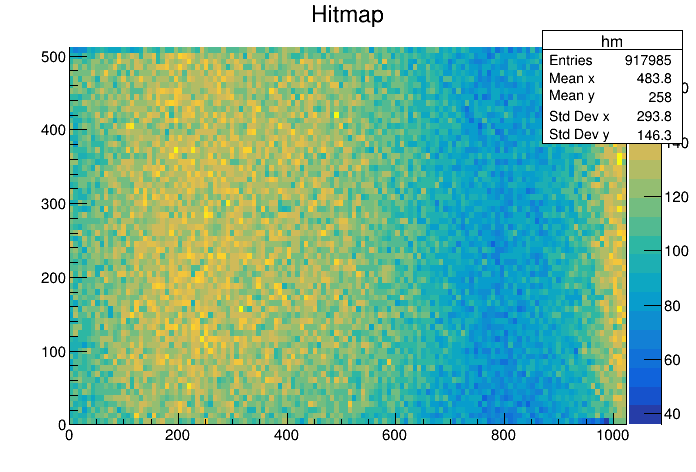

In [6]:
hm = ROOT.TH2D('hm','Hitmap',128,0,1024,64,0,512)

for coordinate in Means:
    hm.Fill(coordinate[0],coordinate[1])
    
    
HC=ROOT.TCanvas()
hm.Draw('COLZ')
HC.Draw()

Info in <TCanvas::Print>: pdf file Area_Histo.pdf has been created


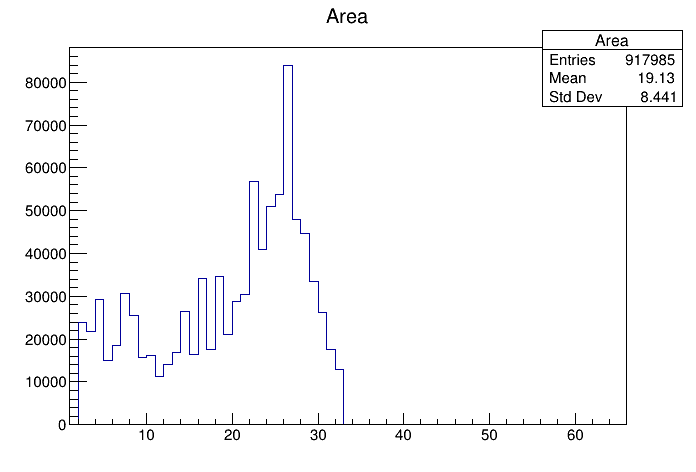

In [7]:
ar_max=int(np.amax(Areas))
nbins=int((ar_max-1))
arHist,AC=make_histo(Areas,'Area',nbins,1,ar_max)
AC.Draw()

Warning in <TFile::Append>: Replacing existing TH1: Area (Potential memory leak).
Info in <TCanvas::Print>: pdf file Area_Histo.pdf has been created
Info in <TCanvas::Print>: pdf file PCA_Ratio_Histo.pdf has been created


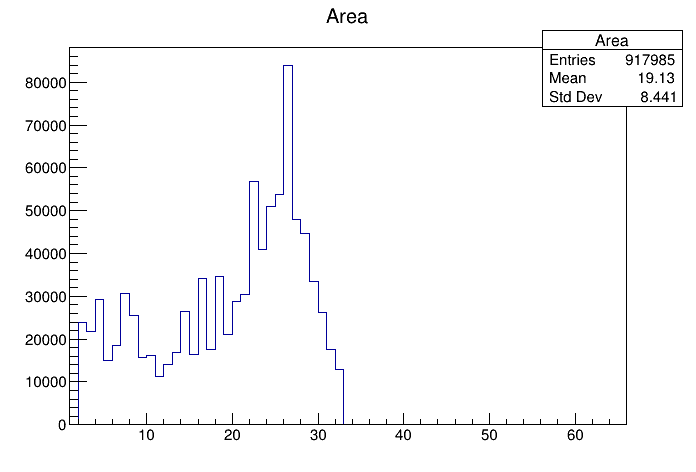

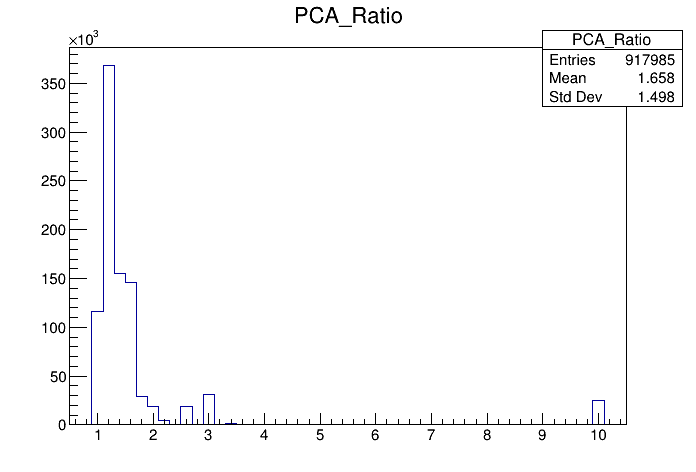

In [8]:
ar_max=int(np.amax(Areas))
nbins=int((ar_max-1))
ArHist,AC=make_histo(Areas,'Area',nbins,1,ar_max)
AC.Draw()

r_max=(np.amax(Ratios)+0.5)
nbins=50
RHist,RC=make_histo(Ratios,'PCA_Ratio',nbins,0.5,r_max)
RC.Draw()

In [9]:
import functools

In [10]:
print(Areas .shape)
print(Means .shape)
print(Theta .shape)
print(Weight.shape)
print(Ratios.shape)





(917985, 1)
(917985, 2)
(917985, 1)
(917985, 1)
(917985, 1)


In [11]:
Area_thr=18
Ratio_thr=3

xmin = 10
xmax = 1013
ymin = 10 
ymax = 490


mask_thr =  np.logical_and (np.squeeze(Areas)      > Area_thr, np.squeeze(Ratios)     < Ratio_thr)
mask_x   =  np.logical_and (np.squeeze(Means[:,0]) > xmin    , np.squeeze(Means[:,0]) < xmax     )
mask_y   =  np.logical_and (np.squeeze(Means[:,1]) > ymin    , np.squeeze(Means[:,1]) < ymax     )

mask = np.logical_and(mask_thr, np.logical_and(mask_x, mask_y))


Areas_disc  = Areas [mask]
Means_disc  = Means [mask]
Theta_disc  = Theta [mask]
Weight_disc = Weight[mask]
Ratios_disc = Ratios[mask]


#A_disc_index = np.where  (Areas<Area_thr)
#Areas_disc   = np.delete (Areas ,A_disc_index)
#Means_disc   = np.delete (Means ,A_disc_index,axis=0)
#Theta_disc   = np.delete (Theta ,A_disc_index)
#Weight_disc  = np.delete (Weight,A_disc_index)
#Ratios_disc  = np.delete (Ratios,A_disc_index)

#R_disc_index=np.where (Ratios_disc>Ratio_thr)
#Areas_disc  =np.delete(Areas_disc,R_disc_index)
#Means_disc  =np.delete(Means_disc,R_disc_index,axis=0)
#Theta_disc  =np.delete(Theta_disc,R_disc_index)
#Weight_disc =np.delete(Weight_disc,R_disc_index)
#Ratios_disc =np.delete(Ratios_disc,R_disc_index)

Warning in <TFile::Append>: Replacing existing TH1: ThHist (Potential memory leak).
Info in <TCanvas::Print>: png file Theta_histo.png has been created


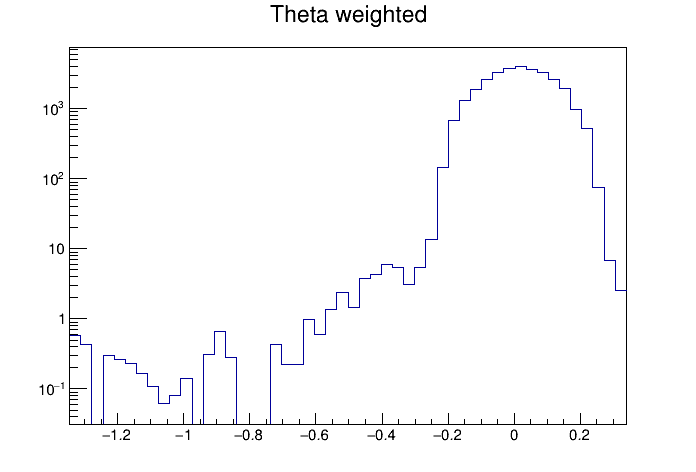

In [14]:
th_max=(np.amax(Theta_disc))
th_min=(np.amin(Theta_disc))
nbins=50

ThHist = ROOT.TH1F('ThHist', 'Theta weighted',nbins,th_min,th_max)

for value,weight in zip(Theta_disc,Weight_disc):
    ThHist.Fill(value,weight/(ALPIDE_norm[int(value*180/(np.pi)/0.9+100)]))
    #ThHist.Fill(value,weight)
    
ThHist.SetStats(False)
    
TC=ROOT.TCanvas()
ThHist.Draw('HIST')
TC.SetLogy()
TC.Draw()
TC.Print('Theta_histo.png')

43
2.9661171436309814


Warning in <TFile::Append>: Replacing existing TH1: Area (Potential memory leak).
Info in <TCanvas::Print>: pdf file Area_Histo.pdf has been created
Info in <TCanvas::Print>: png file Area_histo.png has been created
Info in <TCanvas::Print>: pdf file Ratios_Histo.pdf has been created


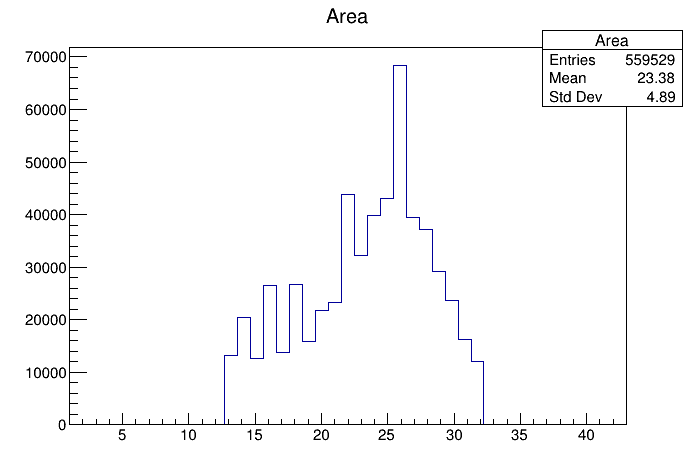

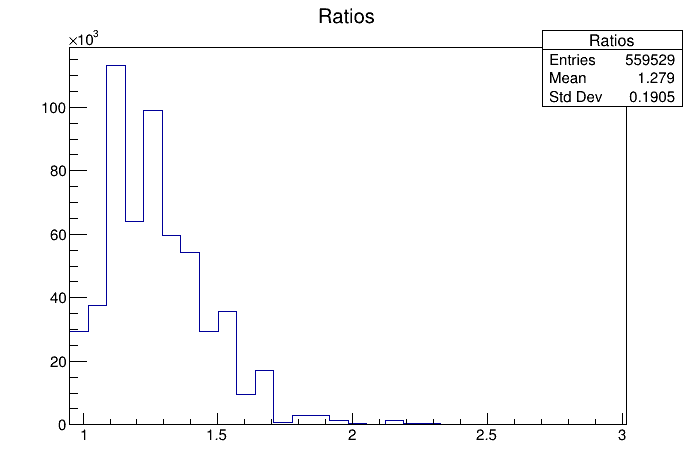

In [42]:
ar_max=int(np.amax(Areas_disc))
print(ar_max)
nbins=int((ar_max))

ArHist,AC=make_histo(Areas_disc,'Area',nbins,1,ar_max)
AC.Draw()
AC.Print('Area_histo.png')

r_max=np.amax(Ratios_disc)
print(r_max)
nbins=30


RHist,RC=make_histo(Ratios_disc,'Ratios',nbins,0.95,r_max+0.05)
RHist.Draw()
RC.Draw()


#MxHist = ROOT.TH1F('MxHist', 'X Means',16,0,1023)
#
#for value in Means_disc[:,0]:
#    MxHist.Fill(value)
#
#MxC=ROOT.TCanvas()
#MxHist.Draw()
#MxC.Draw()